<a href="https://colab.research.google.com/github/Naswinda/Projects/blob/NIDA/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*6610412005 Nawinda A.*

In [ ]:
!pip install requests
!pip install lxml
!pip install yfinance
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2024-02-20 02:42:19--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-20 02:42:19--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-20 02:42:20--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netactuat

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


# **Step 2: Import Data**

In [ ]:
set50 = yf.Ticker('^set.bk')
interval = '1h'
start = '2023-10-1'
end = '2023-12-31'
set50_df = set50.history(interval=interval,start=start,end=end)
set50_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-02 10:00:00+07:00,1474.449951,1477.469971,1462.319946,1462.969971,0,0.0,0.0
2023-10-02 11:00:00+07:00,1463.099976,1476.390015,1463.099976,1475.280029,0,0.0,0.0
2023-10-02 12:00:00+07:00,1475.310059,1475.800049,1471.410034,1473.390015,0,0.0,0.0
2023-10-02 14:00:00+07:00,1473.099976,1476.489990,1471.959961,1475.040039,0,0.0,0.0
2023-10-02 15:00:00+07:00,1475.750000,1477.569946,1469.530029,1470.479980,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,1415.849976,1417.310059,1413.640015,1415.640015,0,0.0,0.0
2023-12-28 12:00:00+07:00,1415.250000,1416.989990,1414.689941,1415.530029,0,0.0,0.0
2023-12-28 14:00:00+07:00,1415.910034,1418.010010,1415.250000,1417.400024,0,0.0,0.0


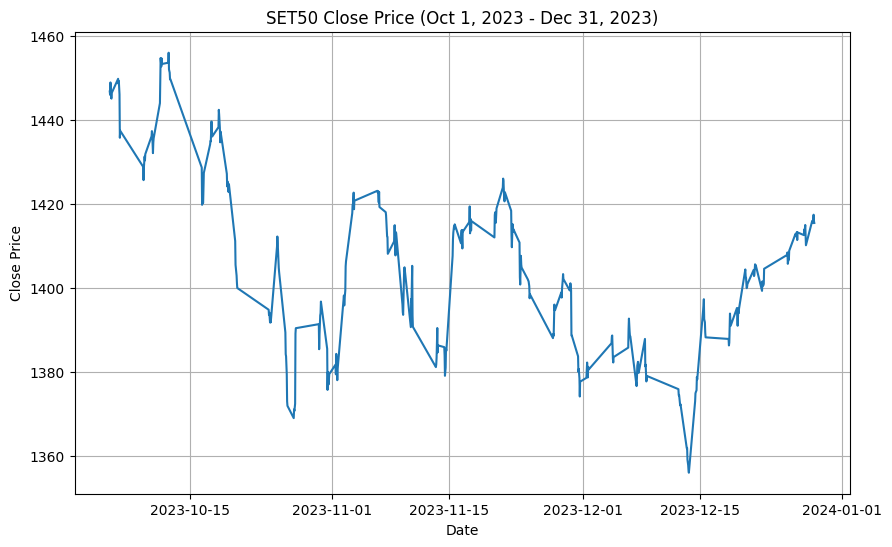

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(set50_df.index, set50_df['Close'])
plt.title('SET50 Close Price (Oct 1, 2023 - Dec 31, 2023)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# **Step 3: Define Predictor/Independent Variables**

In [ ]:
set50_df['S_10'] = set50_df['Close'].rolling(window=10).mean()
set50_df['Corr'] = set50_df['Close'].rolling(window=10).corr(set50_df['S_10'])
set50_df['RSI'] = ta.RSI(np.array(set50_df['Close']), timeperiod=10)
set50_df['Open-Close'] = set50_df['Open'] - set50_df['Close'].shift(1)
set50_df['Open-Open'] = set50_df['Open'] - set50_df['Open'].shift(1)
set50_df = set50_df.dropna()
X = set50_df.iloc[:,:10]
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr,RSI
Datetime,,,,,,,,,,
2023-10-05 10:00:00+07:00,1454.250000,1455.949951,1445.910034,1446.750000,0,0.0,0.0,1448.711987,-0.566887,39.635715
2023-10-05 11:00:00+07:00,1447.770020,1449.670044,1444.739990,1445.949951,0,0.0,0.0,1448.669983,-0.413106,38.813551
2023-10-05 12:00:00+07:00,1445.209961,1448.900024,1444.880005,1448.900024,0,0.0,0.0,1448.715991,-0.563140,43.606211
2023-10-05 14:00:00+07:00,1448.640015,1449.270020,1444.510010,1445.189941,0,0.0,0.0,1448.772986,-0.262006,39.304226
2023-10-05 15:00:00+07:00,1445.780029,1451.079956,1444.219971,1445.050049,0,0.0,0.0,1448.786987,0.259300,39.142441
...,...,...,...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,1415.849976,1417.310059,1413.640015,1415.640015,0,0.0,0.0,1413.315991,0.446592,62.957611
2023-12-28 12:00:00+07:00,1415.250000,1416.989990,1414.689941,1415.530029,0,0.0,0.0,1413.731995,0.400659,62.556636
2023-12-28 14:00:00+07:00,1415.910034,1418.010010,1415.250000,1417.400024,0,0.0,0.0,1414.153003,0.602927,66.577922


# **Step 4: Define Target/Dependent Variable**

In [ ]:
y = np.where(set50_df['Close'].shift(-1) > set50_df['Close'],1,-1)
y

array([-1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,
        1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
       -1,  1,  1, -1, -1

# **Step 5: Split The Dataset**

In [ ]:
split = int(0.7*len(set50_df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# **Step 6: Instantiate The Logistic Regression in Python**

In [ ]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

# **Step 7: Examine The Coefficients**

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.09289472072500107]
1,High,[0.006776378395016173]
2,Low,[-0.10110313432131086]
3,Close,[0.06585140063784672]
4,Volume,[0.0]
5,Dividends,[0.0]
6,Stock Splits,[0.0]
7,S_10,[-0.06412101906626785]
8,Corr,[0.23935114471922808]
9,RSI,[-0.018054110279279192]


# **Step 8: Calculate Class Probabilities**

In [ ]:
prediction_date = '2023-12-2'
probability = model.predict_proba(X_test)
print (probability)

[[0.52063028 0.47936972]
 [0.43813801 0.56186199]
 [0.52887322 0.47112678]
 [0.52485266 0.47514734]
 [0.46819034 0.53180966]
 [0.52564281 0.47435719]
 [0.55490917 0.44509083]
 [0.5154669  0.4845331 ]
 [0.49539224 0.50460776]
 [0.50836368 0.49163632]
 [0.47072404 0.52927596]
 [0.55363861 0.44636139]
 [0.50925408 0.49074592]
 [0.42378975 0.57621025]
 [0.61232757 0.38767243]
 [0.59235574 0.40764426]
 [0.55773231 0.44226769]
 [0.55285527 0.44714473]
 [0.56392802 0.43607198]
 [0.5187721  0.4812279 ]
 [0.39959813 0.60040187]
 [0.59421497 0.40578503]
 [0.52043059 0.47956941]
 [0.59037148 0.40962852]
 [0.58986421 0.41013579]
 [0.43215401 0.56784599]
 [0.50443337 0.49556663]
 [0.55072395 0.44927605]
 [0.50559525 0.49440475]
 [0.49429417 0.50570583]
 [0.51922327 0.48077673]
 [0.4587392  0.5412608 ]
 [0.59665605 0.40334395]
 [0.48714957 0.51285043]
 [0.49382487 0.50617513]
 [0.52670576 0.47329424]
 [0.54689451 0.45310549]
 [0.45215969 0.54784031]
 [0.46327428 0.53672572]
 [0.47461249 0.52538751]


# **Step 9: Predict Class Labels**

In [ ]:
predicted = model.predict(X_test)
print (predicted)

[-1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1]


# **Step 10: Evaluate The Model**

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[38 13]
 [38 14]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.50      0.75      0.60        51
           1       0.52      0.27      0.35        52

    accuracy                           0.50       103
   macro avg       0.51      0.51      0.48       103
weighted avg       0.51      0.50      0.48       103



# **Step 11: Create Trading Strategy Using The Model**

<ipython-input-52-b3466f27e781>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set50_df['Predicted_Signal'] = model.predict(X)
<ipython-input-52-b3466f27e781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set50_df['SET50_returns'] = np.log(set50_df['Close']/set50_df['Close'].shift(1))
<ipython-input-52-b3466f27e781>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

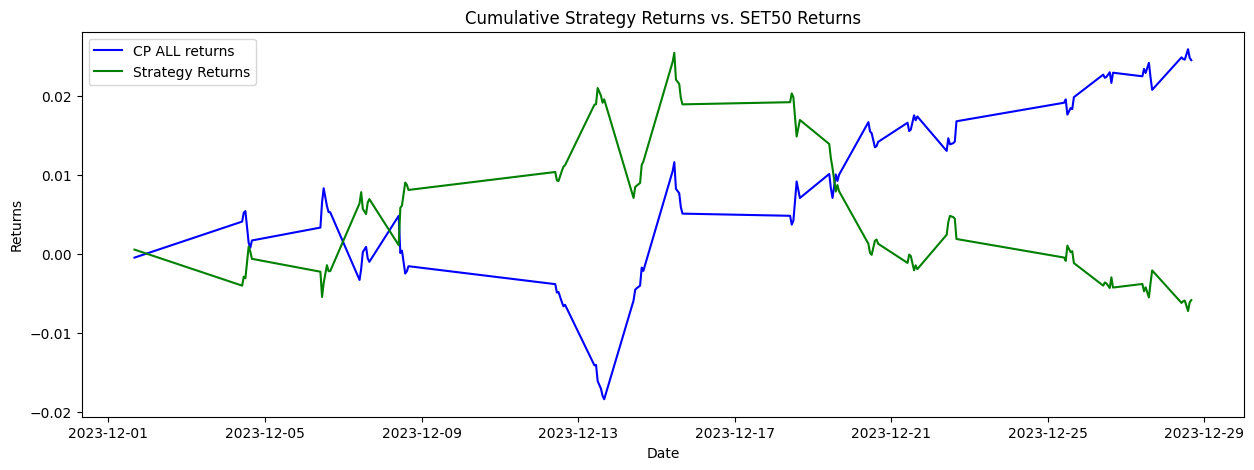

In [ ]:
set50_df['Predicted_Signal'] = model.predict(X)
set50_df['SET50_returns'] = np.log(set50_df['Close']/set50_df['Close'].shift(1))
Cumulative_SET50_returns = np.cumsum(set50_df[split:]['SET50_returns'])

set50_df['Strategy_returns'] = set50_df['SET50_returns']* set50_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(set50_df[split:]['Strategy_returns'])

plt.figure(figsize=(15,5))
plt.plot(Cumulative_SET50_returns , color='b', label='CP ALL returns')
plt.plot(Cumulative_Strategy_returns, color='g', label='Strategy Returns')
plt.legend()
plt.title('Cumulative Strategy Returns vs. SET50 Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()


# **Step 12: Add feature (column)**

In [ ]:
cpall = yf.Ticker('cpall.bk')
cpall_price_df = cpall.history(interval=interval,start=start,end=end)
cpall_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-02 10:00:00+07:00,60.75,60.75,60.25,60.25,2277851,0.0,0.0
2023-10-02 11:00:00+07:00,60.25,61.00,60.25,60.50,2029191,0.0,0.0
2023-10-02 12:00:00+07:00,60.75,61.00,60.50,60.75,861918,0.0,0.0
2023-10-02 14:00:00+07:00,61.00,61.25,60.75,61.00,1395265,0.0,0.0
2023-10-02 15:00:00+07:00,61.00,61.25,60.75,60.75,2590783,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,56.00,56.25,56.00,56.25,480507,0.0,0.0
2023-12-28 12:00:00+07:00,56.00,56.50,56.00,56.00,2493508,0.0,0.0
2023-12-28 14:00:00+07:00,56.00,56.25,56.00,56.00,947969,0.0,0.0


In [ ]:
cpall_df = cpall_price_df.iloc[:, :4]
cpall_df['CPALL'] = cpall_price_df['Close']
cpall_df = cpall_df.dropna()
X_new = cpall_df.iloc[:, :14]
X_new

,Open,High,Low,Close,CPALL
Datetime,,,,,
2023-10-02 10:00:00+07:00,60.75,60.75,60.25,60.25,60.25
2023-10-02 11:00:00+07:00,60.25,61.00,60.25,60.50,60.50
2023-10-02 12:00:00+07:00,60.75,61.00,60.50,60.75,60.75
2023-10-02 14:00:00+07:00,61.00,61.25,60.75,61.00,61.00
2023-10-02 15:00:00+07:00,61.00,61.25,60.75,60.75,60.75
...,...,...,...,...,...
2023-12-28 11:00:00+07:00,56.00,56.25,56.00,56.25,56.25
2023-12-28 12:00:00+07:00,56.00,56.50,56.00,56.00,56.00
2023-12-28 14:00:00+07:00,56.00,56.25,56.00,56.00,56.00


In [ ]:
y_new = np.where(cpall_df['Close'].shift(-1) > cpall_df['Close'],1,-1)

In [ ]:
split = int(0.7*len(cpall_df))
Xn_train, Xn_test, yn_train, yn_test= X_new[:split], X_new[split:], y_new[:split], y_new[split:]
Xn_train

,Open,High,Low,Close,CPALL
Datetime,,,,,
2023-10-02 10:00:00+07:00,60.75,60.75,60.25,60.25,60.25
2023-10-02 11:00:00+07:00,60.25,61.00,60.25,60.50,60.50
2023-10-02 12:00:00+07:00,60.75,61.00,60.50,60.75,60.75
2023-10-02 14:00:00+07:00,61.00,61.25,60.75,61.00,61.00
2023-10-02 15:00:00+07:00,61.00,61.25,60.75,60.75,60.75
...,...,...,...,...,...
2023-11-30 10:00:00+07:00,51.00,52.25,50.50,51.75,51.75
2023-11-30 11:00:00+07:00,51.75,52.00,51.50,51.75,51.75
2023-11-30 12:00:00+07:00,51.75,52.00,51.50,51.50,51.50


In [ ]:
model = LogisticRegression()
model = model.fit (Xn_train,yn_train)

In [ ]:
pd.DataFrame(zip(X_new.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.270614941299745]
1,High,[0.5619080493838133]
2,Low,[0.6870297655885468]
3,Close,[-0.7682141394184783]
4,CPALL,[-0.7682141394184878]


In [ ]:
probability = model.predict_proba(Xn_test)
print (probability)

[[0.81236703 0.18763297]
 [0.80317356 0.19682644]
 [0.77533938 0.22466062]
 [0.64912419 0.35087581]
 [0.77607341 0.22392659]
 [0.73174963 0.26825037]
 [0.74481962 0.25518038]
 [0.81619498 0.18380502]
 [0.77753633 0.22246367]
 [0.70505323 0.29494677]
 [0.60240563 0.39759437]
 [0.61749602 0.38250398]
 [0.73174963 0.26825037]
 [0.80368971 0.19631029]
 [0.77680572 0.22319428]
 [0.77753633 0.22246367]
 [0.68898683 0.31101317]
 [0.77680572 0.22319428]
 [0.65104356 0.34895644]
 [0.78761062 0.21238938]
 [0.79348832 0.20651168]
 [0.73257695 0.26742305]
 [0.65104356 0.34895644]
 [0.618492   0.381508  ]
 [0.70329554 0.29670446]
 [0.68808207 0.31191793]
 [0.5993703  0.4006297 ]
 [0.78690403 0.21309597]
 [0.73620966 0.26379034]
 [0.71550168 0.28449832]
 [0.74401693 0.25598307]
 [0.76163563 0.23836437]
 [0.73009013 0.26990987]
 [0.64816268 0.35183732]
 [0.73009013 0.26990987]
 [0.61450218 0.38549782]
 [0.78619573 0.21380427]
 [0.63690196 0.36309804]
 [0.65965362 0.34034638]
 [0.68262351 0.31737649]


In [ ]:
predicted_new = model.predict(Xn_test)
print (predicted)

[-1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1]


In [ ]:
print(metrics.classification_report(yn_test, predicted_new))

              precision    recall  f1-score   support

          -1       0.66      1.00      0.80        72
           1       0.00      0.00      0.00        37

    accuracy                           0.66       109
   macro avg       0.33      0.50      0.40       109
weighted avg       0.44      0.66      0.53       109



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#เรียก SET50 ใหม่ เพราะอันเดิมถูกเปลี่ยน shape
set50_new = yf.Ticker('^set.bk')
set50_new_df = set50.history(interval=interval,start=start,end=end)

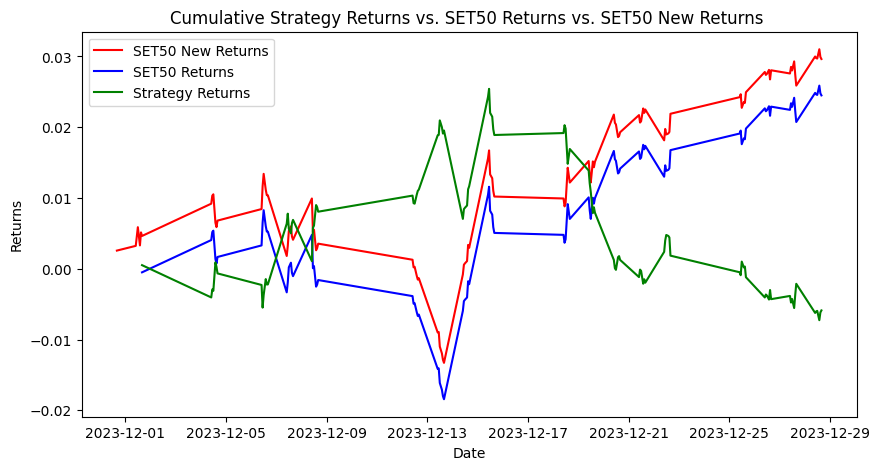

In [ ]:
#New Model
set50_new_df['Predicted_New_Signal'] = model.predict(X_new)
set50_new_df['SET50_New_returns'] = np.log(set50_new_df['Close']/set50_new_df['Close'].shift(1))
Cumulative_New_SET50_returns = np.cumsum(set50_new_df[split:]['SET50_New_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_New_SET50_returns , color='r', label='SET50 New Returns')
plt.plot(Cumulative_SET50_returns , color='b', label='SET50 Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label='Strategy Returns')
plt.legend()
plt.title('Cumulative Strategy Returns vs. SET50 Returns vs. SET50 New Returns ')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In [ ]:
set50_new_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Predicted_New_Signal,SET50_New_returns
Datetime,,,,,,,,,
2023-10-02 10:00:00+07:00,1474.449951,1477.469971,1462.319946,1462.969971,0,0.0,0.0,-1,NaN
2023-10-02 11:00:00+07:00,1463.099976,1476.390015,1463.099976,1475.280029,0,0.0,0.0,-1,0.008379
2023-10-02 12:00:00+07:00,1475.310059,1475.800049,1471.410034,1473.390015,0,0.0,0.0,-1,-0.001282
2023-10-02 14:00:00+07:00,1473.099976,1476.489990,1471.959961,1475.040039,0,0.0,0.0,-1,0.001119
2023-10-02 15:00:00+07:00,1475.750000,1477.569946,1469.530029,1470.479980,0,0.0,0.0,-1,-0.003096
...,...,...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,1415.849976,1417.310059,1413.640015,1415.640015,0,0.0,0.0,-1,-0.000212
2023-12-28 12:00:00+07:00,1415.250000,1416.989990,1414.689941,1415.530029,0,0.0,0.0,-1,-0.000078
2023-12-28 14:00:00+07:00,1415.910034,1418.010010,1415.250000,1417.400024,0,0.0,0.0,-1,0.001320


In [ ]:
from sklearn.metrics import classification_report

print("Old Model:\n", classification_report(y_test, predicted))
print("New Model:\n", classification_report(yn_test, predicted_new))

Old Model:
               precision    recall  f1-score   support

          -1       0.50      0.75      0.60        51
           1       0.52      0.27      0.35        52

    accuracy                           0.50       103
   macro avg       0.51      0.51      0.48       103
weighted avg       0.51      0.50      0.48       103

New Model:
               precision    recall  f1-score   support

          -1       0.66      1.00      0.80        72
           1       0.00      0.00      0.00        37

    accuracy                           0.66       109
   macro avg       0.33      0.50      0.40       109
weighted avg       0.44      0.66      0.53       109



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
